In [1]:
import numpy as np
import matplotlib.pyplot as plt

import generators as gen
from IPython.display import Audio, display
import librosa

import utils

In [2]:
SAMPLE_RATE = 44100

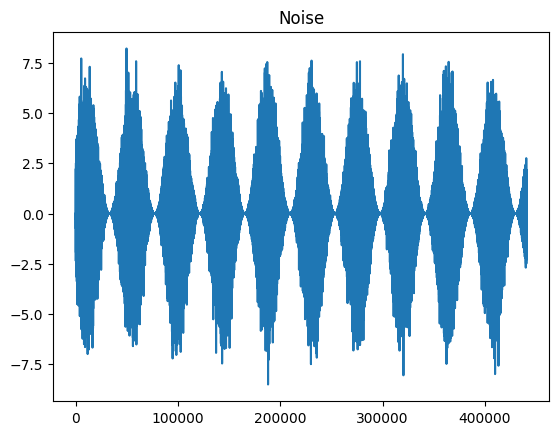

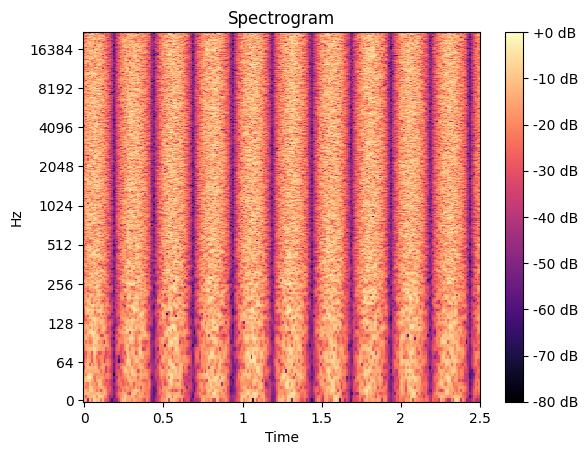

In [3]:
noise = gen.noise(amp=gen.sine_wave([1], [10])+1, duration=10)
plt.plot(noise)
plt.title("Noise")
plt.show()

display(Audio(noise, rate=SAMPLE_RATE))
utils.spectrogram(noise)


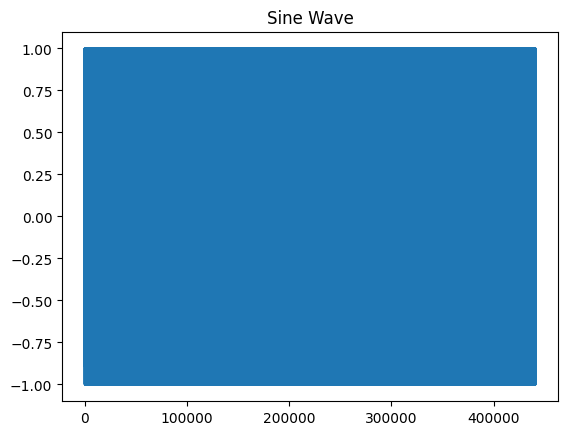

In [4]:
sine = gen.sine_wave([1], [440], duration=10)
plt.plot(sine)
plt.title("Sine Wave")
plt.show()

display(Audio(sine, rate=SAMPLE_RATE))


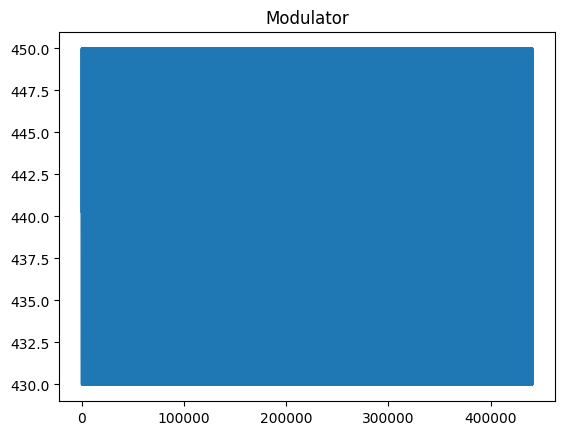

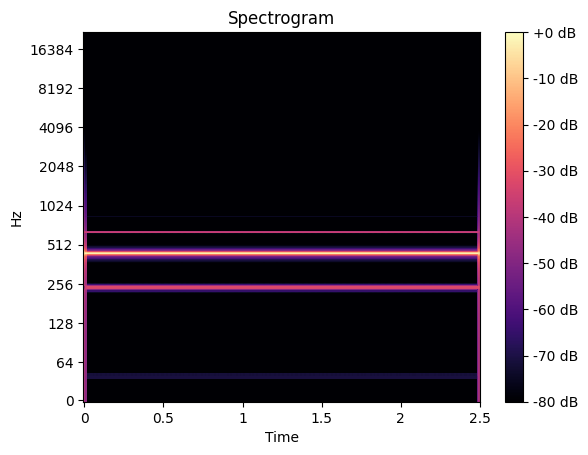

In [5]:
modulator = gen.sine_wave([1], [200])*10 + 440

fm_sine = gen.sine_wave([1], np.tile(modulator,10), duration=10)

plt.plot(np.tile(modulator,10))
plt.title("Modulator")
plt.show()

display(Audio(fm_sine, rate=SAMPLE_RATE))

utils.spectrogram(fm_sine)

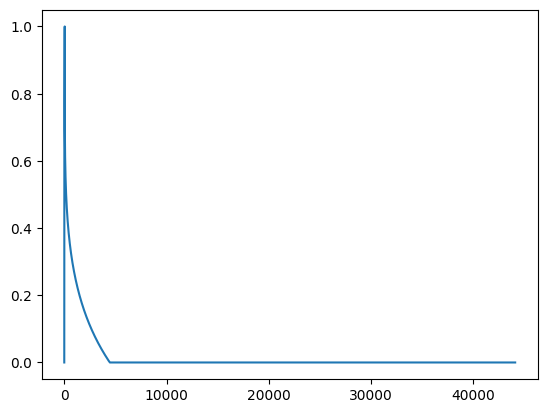

In [6]:
adsr = gen.adsr(0.001, 0.1, 0.0, 0.2, 0.2)

plt.plot(adsr)
plt.show()

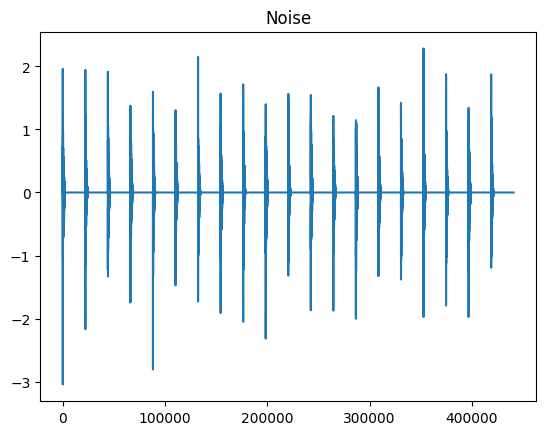

In [7]:
noise = gen.noise(amp=np.tile(adsr, 20), duration=10)
plt.plot(noise)
plt.title("Noise")
plt.show()

display(Audio(noise, rate=SAMPLE_RATE))


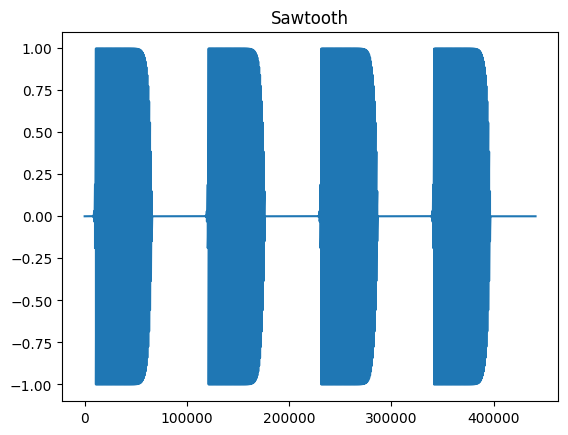

In [8]:
adsr = gen.adsr(0.1, 0.5, 0.0, 0.2, 20)
saw = gen.sawtooth_wave(np.tile(adsr, 4), [50], duration=10)

noise = gen.noise(duration=10)

audio = saw+noise

plt.plot(saw)
plt.title("Sawtooth")
plt.show()

display(Audio(saw, rate=SAMPLE_RATE))

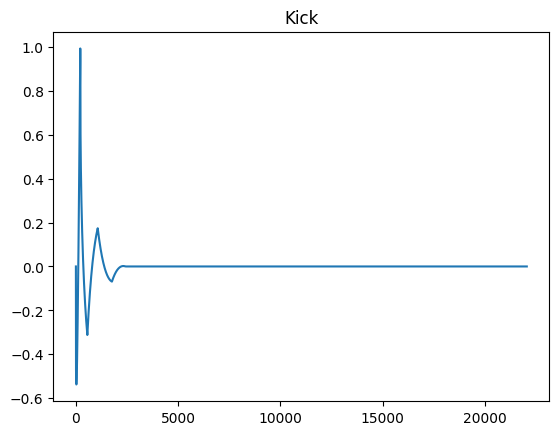

In [9]:
kick_adsr = gen.adsr(0.01, 0.1, 0.0, 0.2, 0.2)
kick = gen.triangle_wave(kick_adsr, kick_adsr*100+20, duration=0.5)

plt.plot(kick)
plt.title("Kick")

plt.show()

display(Audio(np.tile(kick,16), rate=SAMPLE_RATE))

<class 'numpy.ndarray'>


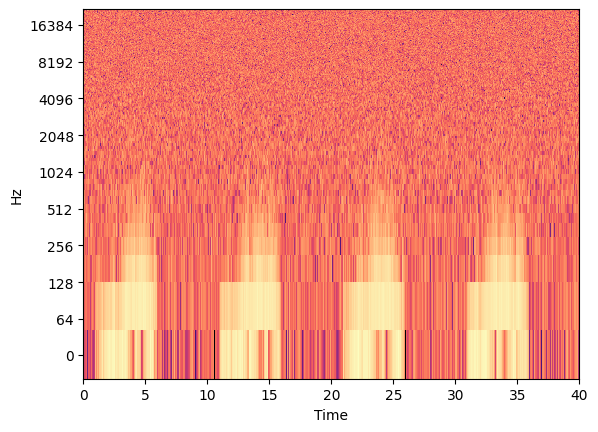

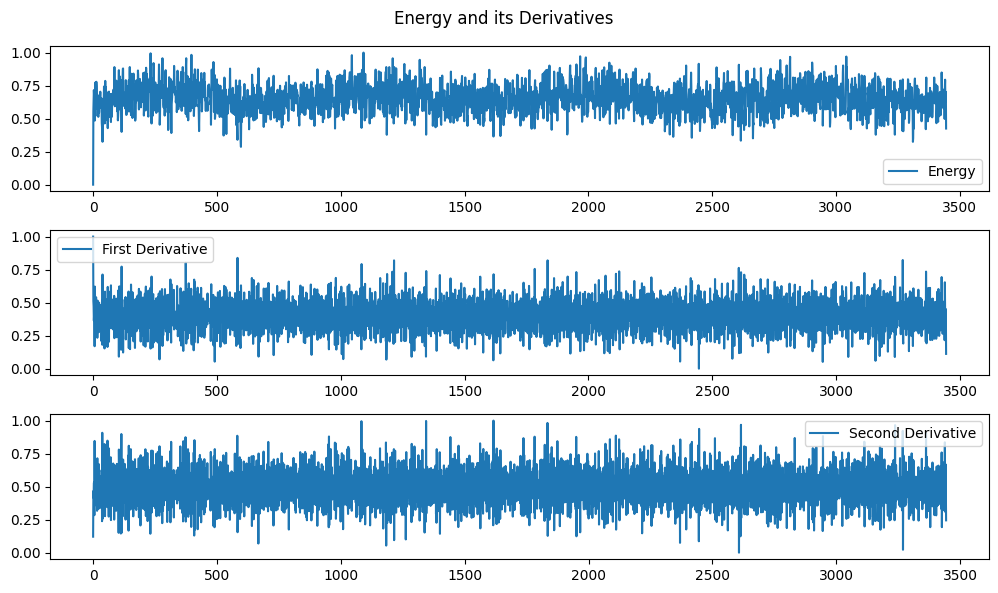

In [10]:
audio = noise
audio = saw+noise


spectrum = librosa.amplitude_to_db(np.abs(librosa.stft(audio, n_fft=512)), ref=np.max)

display(Audio(utils.add_padding(audio), rate=SAMPLE_RATE))

librosa.display.specshow(spectrum, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.show()

energy = np.sum(spectrum, axis=0)
d_energy = np.diff(energy)
dd_energy = np.diff(d_energy)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((energy-np.min(energy))/ np.max(energy-np.min(energy)), label='Energy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot((d_energy-np.min(d_energy))/ np.max(d_energy-np.min(d_energy)), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot((dd_energy-np.min(dd_energy))/ np.max(dd_energy-np.min(dd_energy)), label='Second Derivative')
plt.legend()

plt.suptitle("Energy and its Derivatives")
plt.tight_layout()
plt.show()

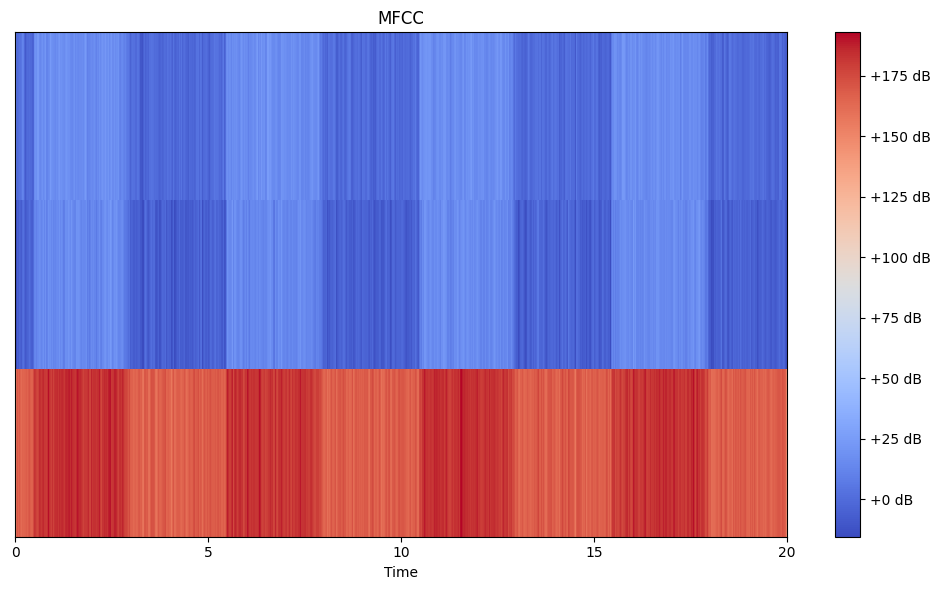

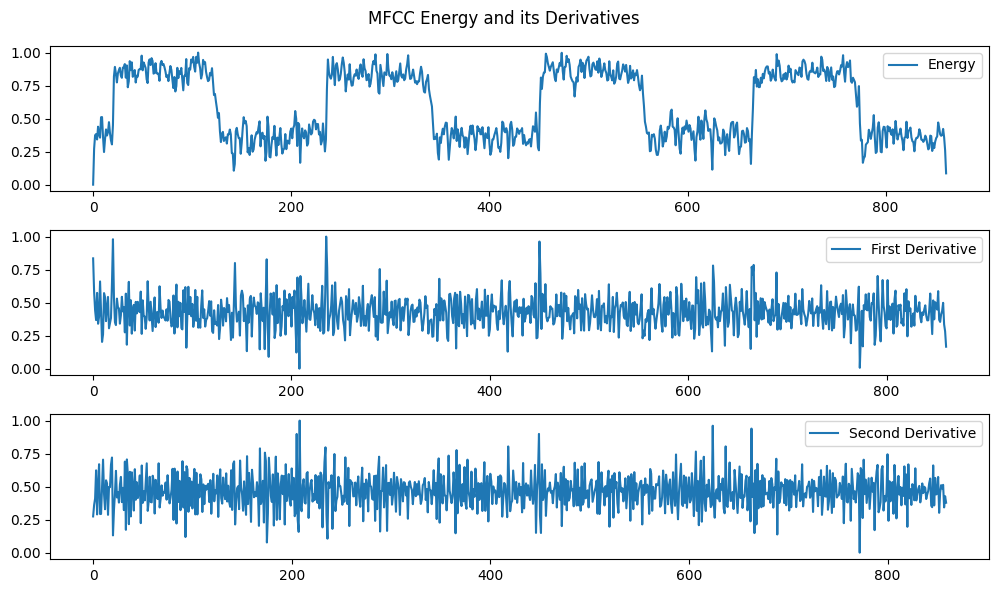

In [16]:
mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=3)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

mfcc_sum = np.sum(mfcc, axis=0)
d_mfcc_sum = np.diff(mfcc_sum)
dd_mfcc_sum = np.diff(d_mfcc_sum)


plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((mfcc_sum-np.min(mfcc_sum))/ np.max(mfcc_sum-np.min(mfcc_sum)), label='Energy')
plt.legend()
plt.subplot(3, 1, 2)

plt.plot((d_mfcc_sum-np.min(d_mfcc_sum))/ np.max(d_mfcc_sum-np.min(d_mfcc_sum)), label='First Derivative')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot((dd_mfcc_sum-np.min(dd_mfcc_sum))/ np.max(dd_mfcc_sum-np.min(dd_mfcc_sum)), label='Second Derivative')
plt.legend()
plt.suptitle("MFCC Energy and its Derivatives")
plt.tight_layout()
plt.show()



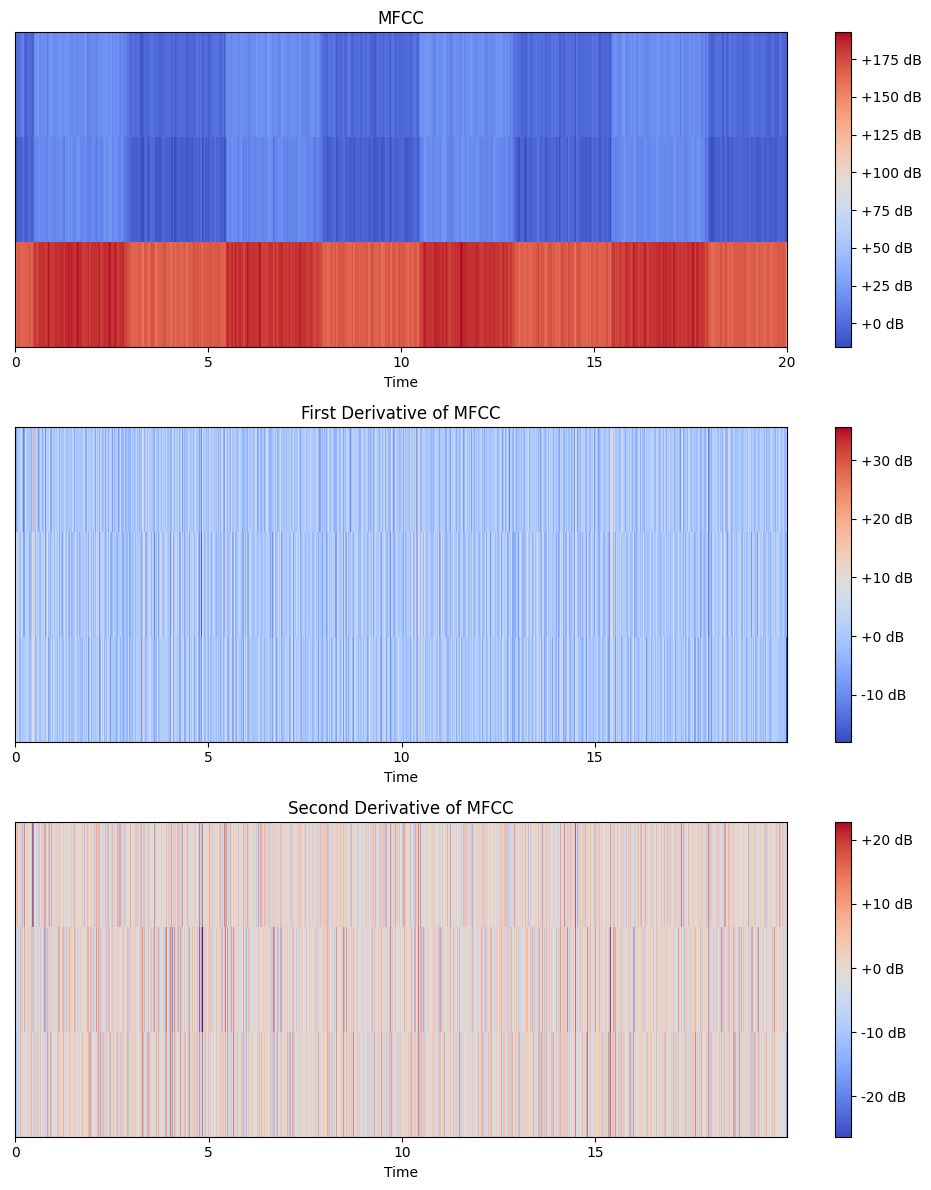

In [17]:
d_mfcc = np.diff(mfcc, axis=1)
dd_mfcc = np.diff(d_mfcc, axis=1)
plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.subplot(3, 1, 2)
librosa.display.specshow(d_mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('First Derivative of MFCC')
plt.subplot(3, 1, 3)
librosa.display.specshow(dd_mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Second Derivative of MFCC')
plt.tight_layout()
plt.show()

